In [248]:
import numpy as np
import matplotlib.pyplot as plt

## 6.1.21, 6.2.4, 6.6.11, 6.8.2

# ======================= 6.1.21 =======================

In [249]:
x = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
y = np.array([-2.815, -2.18, -0.225, 1.722, 3.492, 3.31, 2.945, 1.449, 0.334, -1.906, -3.430, -2.983, 0.087])
# 
# x = np.array([-3.2, -2.66, -2.12, -1.58, -1.04, -0.5, 0.04, 0.58, 1.12, 1.66, 2.2])
# y = np.array([-0.173, -0.574, -1.811, -1.849, 0.123, 1.462, 2.399, 1.300, 1.703, -2.045, 2.817])

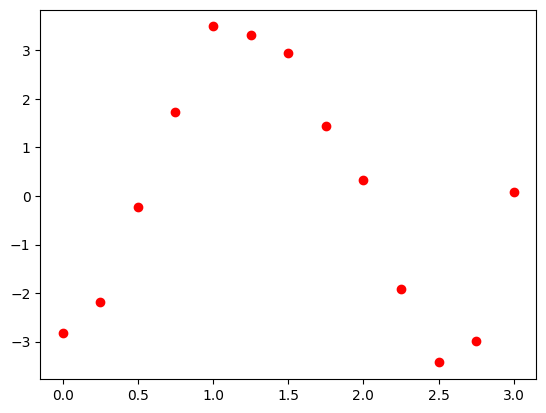

In [250]:
plt.plot(x, y, 'ro')

In [251]:
def lsm(x: np.array, y: np.array, higher_degree=1):
    m = higher_degree + 1

    b = np.empty(m)  # b
    gramm = np.empty((m, m))  # Г

    # b = (P^T)*y
    for j in range(m):
        b[j] = np.sum(y * x ** j)

    # Г = (P^T)*P
    for j in range(m):
        for k in range(m):
            gramm[j][k] = sum(x ** (k + j))

    best_coefficients = np.linalg.solve(gramm, b)

    def approximation(point_x):
        point_y = 0
        for i in range(m):
            point_y += best_coefficients[i] * point_x ** i
        return point_y

    return approximation, best_coefficients

In [252]:
rmse_array = []
functions = []
coefficients = []
for m in range(len(x)):
    function, coefficient = lsm(x, y, m)
    rmse = np.sqrt((1 / (len(x) - m)) * np.sum((function(x) - y) ** 2))
    rmse_array.append(rmse)
    functions.append(function)
    coefficients.append(coefficient)

<BarContainer object of 13 artists>

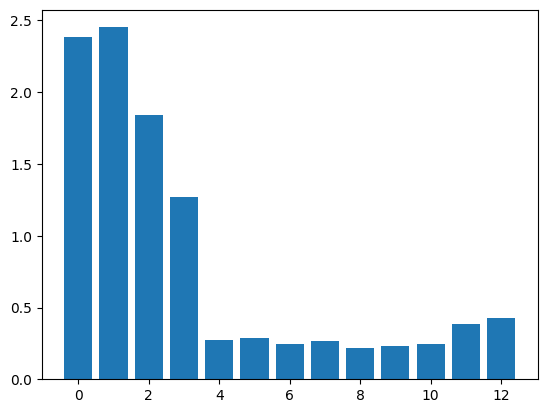

In [253]:
plt.bar(x=np.arange(len(rmse_array)), height=rmse_array)


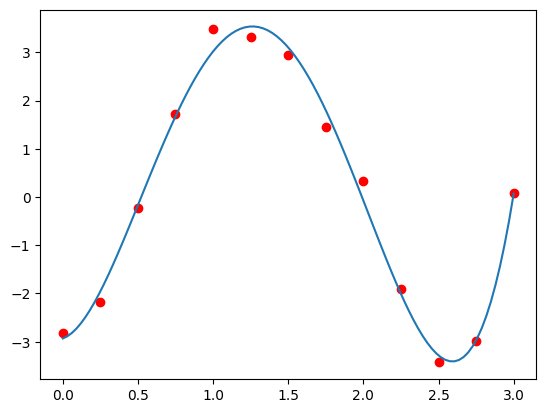

In [254]:
function, _ = lsm(x, y, 4)

plt.scatter(x, y, c='r')
x_linspace = np.linspace(min(x), max(x), 100)
plt.plot(x_linspace, function(x_linspace))

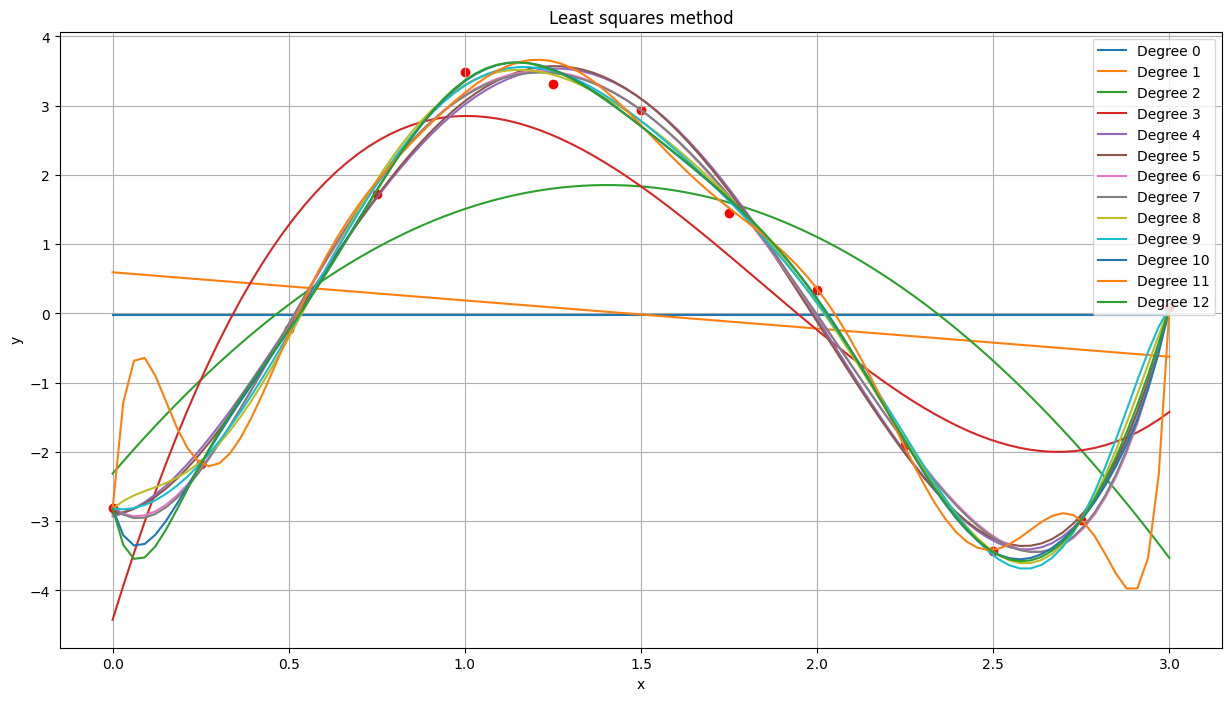

In [255]:
plt.figure(figsize=(15, 8))

for i in range(len(functions)):
    plt.plot(x_linspace, functions[i](x_linspace), label=f"Degree {str(i)}")
plt.scatter(x, y, c='r')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least squares method')
plt.grid(True)

# ======================= 6.2.4 =======================

In [256]:
t = [0, 0.6, 1.2, 1.8, 2.4, 3, 4.2, 4.8, 5.4, 6]
x = [6.449, 19.97, 33.91, 48.2, 64.15, 76.9, 106.2, 122.2, 135.6, 149]

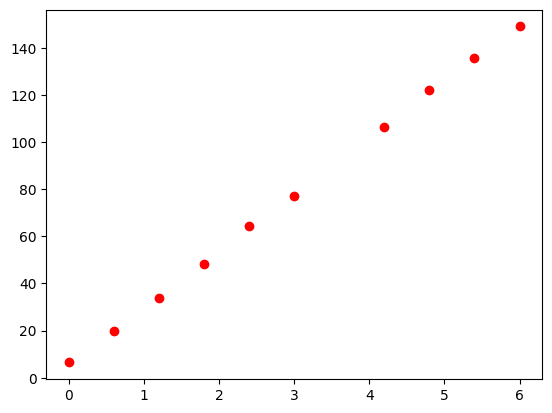

In [257]:
plt.scatter(t, x, c='r')

In [258]:
approximation, best_coefficients = lsm(np.array(t),x,1)
print(best_coefficients)

[ 5.69371993 24.00142179]


In [259]:
t.append(t[-1]*2)
x.append(approximation(t[-1]))

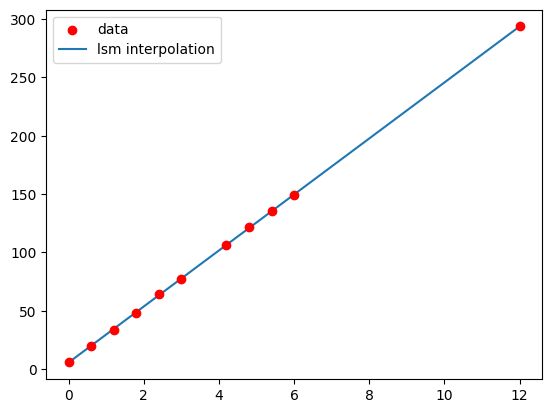

In [260]:
plt.scatter(t, x, c='r', label='data', zorder=10)
plt.plot(t, approximation(np.array(t)), label='lsm interpolation')
plt.legend()

# ======================= 6.6.11 =======================


In [261]:
def f(x):
    return x*x*np.cos(x)

In [262]:
def lagrange_interpolating_polynomial(x_nodes, x):
    y_nodes = f(x_nodes)
    def basis_polynomial(i):
        p = [(x - x_nodes[j]) / (x_nodes[i] - x_nodes[j]) for j in range(len(x_nodes)) if j != i]
        return np.prod(p, axis=0)

    P = np.sum(y_nodes[i] * basis_polynomial(i) for i in range(len(x_nodes)))
    return P


In [263]:

a, b = np.pi/2, np.pi
nodes_1 = np.linspace(a, b, 2)
nodes_2 = np.linspace(a, b, 3)
nodes_3 = np.linspace(a, b, 4)

x_vals = np.linspace(a, b, 500)
y_1 = lagrange_interpolating_polynomial(nodes_1, x_vals)
y_2 = lagrange_interpolating_polynomial(nodes_2, x_vals)
y_3 = lagrange_interpolating_polynomial(nodes_3, x_vals)



/tmp/ipykernel_104606/139752051.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  P = np.sum(y_nodes[i] * basis_polynomial(i) for i in range(len(x_nodes)))


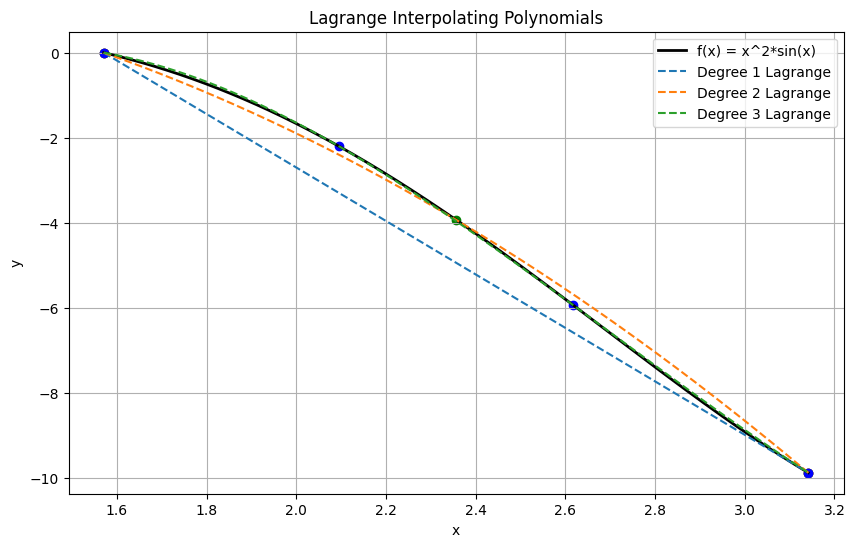

In [264]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label='f(x) = x^2*sin(x)', color='black', linewidth=2)
plt.plot(x_vals, y_1, label='Degree 1 Lagrange', linestyle='--')
plt.plot(x_vals, y_2, label='Degree 2 Lagrange', linestyle='--')
plt.plot(x_vals, y_3, label='Degree 3 Lagrange', linestyle='--')
plt.scatter(nodes_1, f(nodes_1), color='red')
plt.scatter(nodes_2, f(nodes_2), color='green')
plt.scatter(nodes_3, f(nodes_3), color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolating Polynomials')
plt.grid(True)
plt.show()


In [265]:
nodes_3_1 = [np.pi/2, 2.3, np.pi]
nodes_3_2 = [np.pi/2, np.pi/2+0.25,np.pi/2+0.5]
nodes_3_3 = [np.pi-0.5, np.pi-0.25,np.pi]

y_3_1 = lagrange_interpolating_polynomial(np.array(nodes_3_1), x_vals)
y_3_2 = lagrange_interpolating_polynomial(np.array(nodes_3_2), x_vals)
y_3_3 = lagrange_interpolating_polynomial(np.array(nodes_3_3), x_vals)

/tmp/ipykernel_104606/139752051.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  P = np.sum(y_nodes[i] * basis_polynomial(i) for i in range(len(x_nodes)))


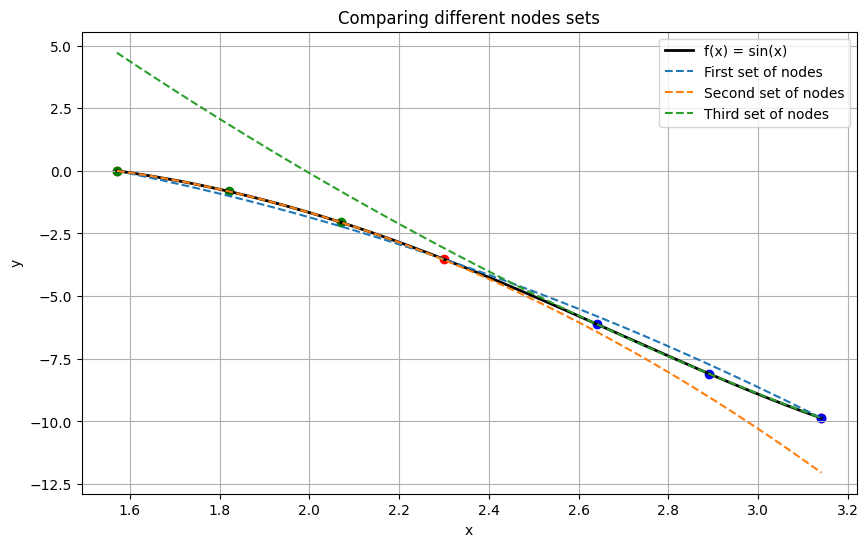

In [266]:
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f(x_vals), label='f(x) = sin(x)', color='black', linewidth=2)
plt.plot(x_vals, y_3_1, label='First set of nodes', linestyle='--')
plt.plot(x_vals, y_3_2, label='Second set of nodes', linestyle='--')
plt.plot(x_vals, y_3_3, label='Third set of nodes', linestyle='--')
plt.scatter(nodes_3_1, f(np.array(nodes_3_1)), color='red')
plt.scatter(nodes_3_2, f(np.array(nodes_3_2)), color='green')
plt.scatter(nodes_3_3, f(np.array(nodes_3_3)), color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparing different nodes sets')
plt.grid(True)
plt.show()

# ======================= 6.8.2 =======================


In [267]:
def f(x):
    return np.exp(x)*np.sin(5*x)

In [268]:
a, b = 1.5, 3.5
k = 5
mult = 1
x_uniform = np.linspace(a, b, mult*k)
x_chebyshev = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(1, mult*k + 1) - 1) / (2 * mult*k) * np.pi)

x_dense = np.linspace(a, b, 3 * k)
y_true = f(x_dense)

In [269]:
y_interpolated_uniform_1 = lagrange_interpolating_polynomial(x_uniform, x_dense)
y_interpolated_chebyshev_1 = lagrange_interpolating_polynomial(x_chebyshev, x_dense)

/tmp/ipykernel_104606/139752051.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  P = np.sum(y_nodes[i] * basis_polynomial(i) for i in range(len(x_nodes)))


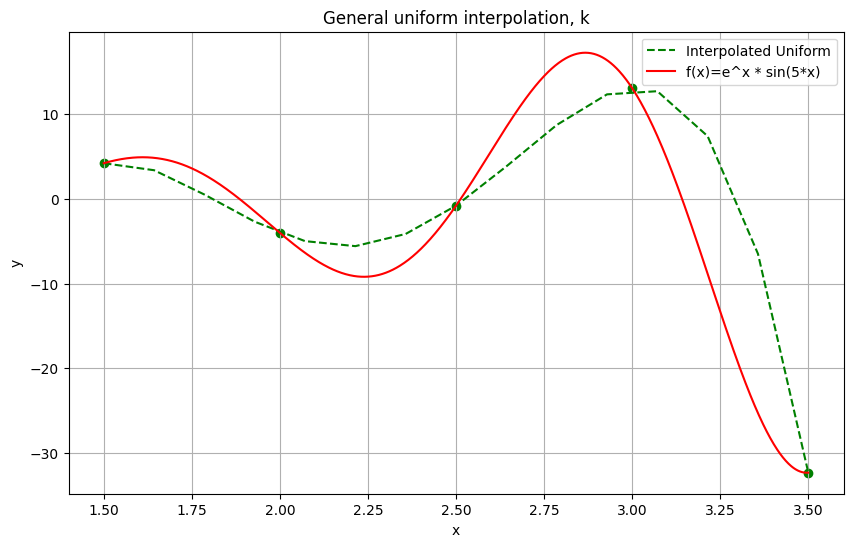

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_interpolated_uniform_1, 'g--', label='Interpolated Uniform')
plt.plot(np.linspace(a,b,1000), f(np.linspace(a,b,1000)), 'r-', label='f(x)=e^x * sin(5*x)')
plt.scatter(x_uniform, f(x_uniform), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, k')
plt.grid(True)

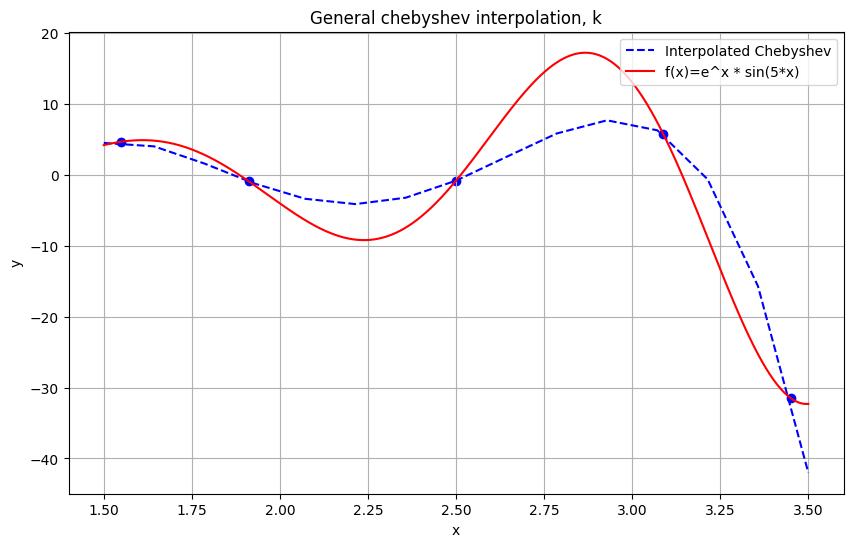

In [272]:
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_interpolated_chebyshev_1, 'b--', label='Interpolated Chebyshev')
plt.plot(np.linspace(a,b,1000), f(np.linspace(a,b,1000)), 'r-', label='f(x)=e^x * sin(5*x)')
plt.scatter(x_chebyshev, f(x_chebyshev), c='b')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General chebyshev interpolation, k')
plt.grid(True)

In [273]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

error_uniform_3k = mse(y_true, y_interpolated_uniform_1)
error_chebyshev_3k = mse(y_true, y_interpolated_chebyshev_1)

print(f"MSE для равномерных узлов: {error_uniform_3k}")
print(f"MSE для чебышевских узлов: {error_chebyshev_3k}")

MSE для равномерных узлов: 51.22783241181496
MSE для чебышевских узлов: 34.663443726876814


In [274]:
mult = 2
x_uniform = np.linspace(a, b, mult*k)
x_chebyshev = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(1, mult*k + 1) - 1) / (2 * mult*k) * np.pi)

x_dense = np.linspace(a, b, 3 * k)
y_true = f(x_dense)
y_interpolated_uniform_2 = lagrange_interpolating_polynomial(x_uniform, x_dense)
y_interpolated_chebyshev_2 = lagrange_interpolating_polynomial(x_chebyshev, x_dense)


/tmp/ipykernel_104606/139752051.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  P = np.sum(y_nodes[i] * basis_polynomial(i) for i in range(len(x_nodes)))


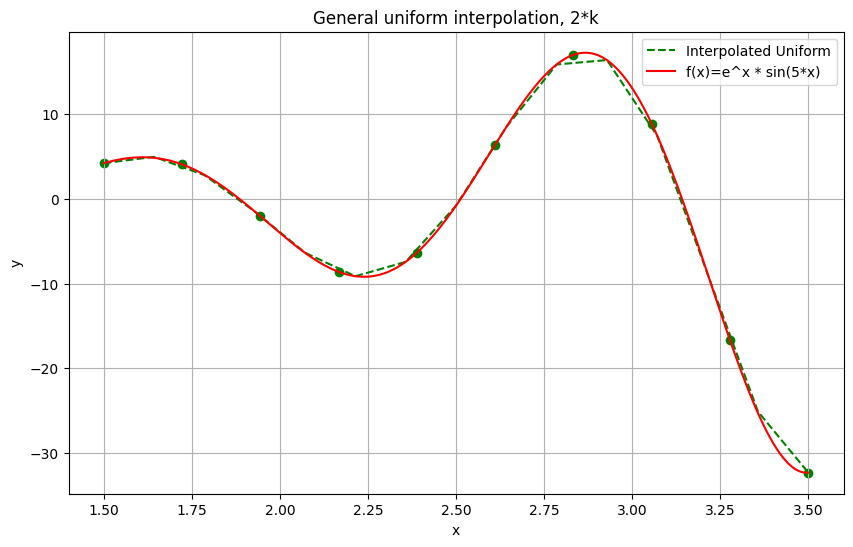

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_interpolated_uniform_2, 'g--', label='Interpolated Uniform')
plt.plot(np.linspace(a,b,1000), f(np.linspace(a,b,1000)), 'r-', label='f(x)=e^x * sin(5*x)')
plt.scatter(x_uniform, f(x_uniform), c='g')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General uniform interpolation, 2*k')
plt.grid(True)

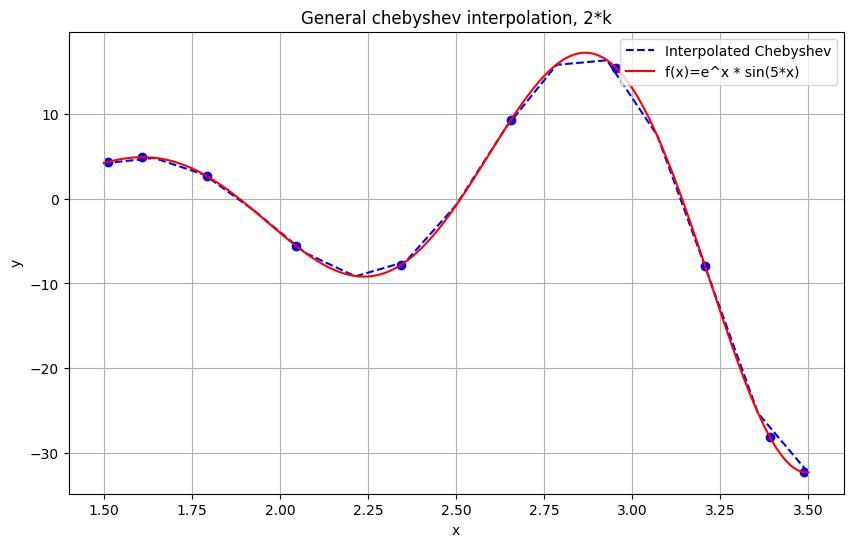

In [276]:
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_interpolated_chebyshev_2, 'b--', label='Interpolated Chebyshev')
plt.plot(np.linspace(a,b,1000), f(np.linspace(a,b,1000)), 'r-', label='f(x)=e^x * sin(5*x)')
plt.scatter(x_chebyshev, f(x_chebyshev), c='b')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('General chebyshev interpolation, 2*k')
plt.grid(True)

In [277]:
error_uniform_2k = mse(y_true, y_interpolated_uniform_2)
error_chebyshev_2k = mse(y_true, y_interpolated_chebyshev_2)

print(f"MSE для равномерных узлов: {error_uniform_2k}")
print(f"MSE для чебышевских узлов: {error_chebyshev_2k}")

MSE для равномерных узлов: 0.0035609297968879823
MSE для чебышевских узлов: 0.0010366882097171295
